In [ ]:
# !pip install -U scikit-image

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from skimage import data
from skimage import registration
from skimage.registration import phase_cross_correlation
from scipy.ndimage import fourier_shift

In [ ]:
def phase_correlation(a, b):
    G_a = np.fft.fft2(a)
    G_b = np.fft.fft2(b)
    conj_b = np.ma.conjugate(G_b)
    R = G_a*conj_b
    R /= np.absolute(R)
    r = np.fft.ifft2(R).real
    return r

In [ ]:
def phase_and_show(image, offset_image):

    # Amplitude-phaze correlation
    image_product = np.fft.fft2(image) * np.fft.fft2(offset_image).conj()
    cc_image = np.fft.fftshift(np.fft.ifft2(image_product))

    # Phaze correlation
    corrimg = phase_correlation(image, offset_image)
    print(cv2.minMaxLoc(corrimg))

    # pixel precision first
    shift, error, diffphase = phase_cross_correlation(cc_image.real, corrimg.real)

    # Show the output
    fig, axes = plt.subplots(2, 2)

    axes[0][0].imshow(image, cmap = 'gray')
    axes[0][0].set_title('Input image')

    axes[0][1].imshow(offset_image.real, cmap = 'gray')
    axes[0][1].set_title('Offset image')

    axes[1][0].imshow(cc_image.real, cmap = 'gray')
    axes[1][0].set_title('Amplitude-phaze')

    axes[1][1].imshow(corrimg.real, cmap = 'gray')
    axes[1][1].set_title('Phaze')

    fig.set_figwidth(12)
    fig.set_figheight(6)

    plt.show()

    print("Detected pixel offset: {}".format(shift))

Вычисление амплитудно-фазовой и фазовой корреляций при нулевом векторе смещения

Known offset: (0, 0)
(-1.0392527679424107e-16, 1.0, (259, 242), (0, 0))


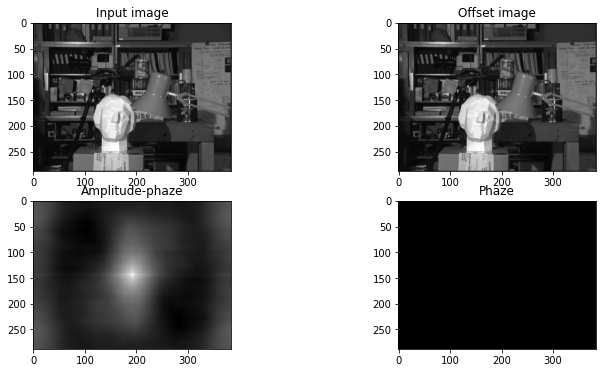

Detected pixel offset: [144. 192.]


In [ ]:
image = cv2.imread('left.png',0)
shift = (0, 0)

offset_image = fourier_shift(np.fft.fftn(image), shift)
offset_image = np.fft.ifftn(offset_image)

print("Known offset: {}".format(shift))

phase_and_show(image, offset_image)

Вычисление амплитудно-фазовой и фазовой корреляций при векторе смещения (100, 100)

Known offset: (100, 100)
(-4.98831766986901e-15, 0.9999999999999998, (285, 188), (284, 188))


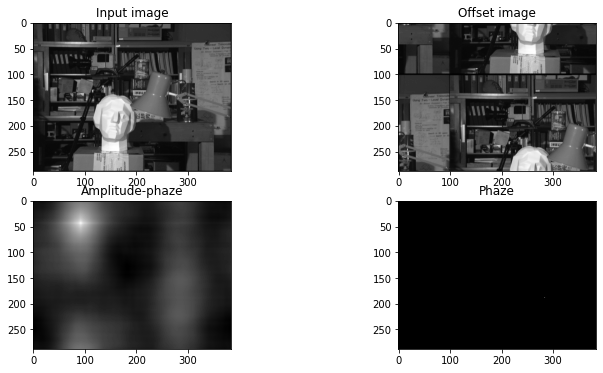

Detected pixel offset: [144. 192.]


In [ ]:
image = cv2.imread('left.png',0)
shift = (100, 100)

offset_image = fourier_shift(np.fft.fftn(image), shift)
offset_image = np.fft.ifftn(offset_image)

print("Known offset: {}".format(shift))

phase_and_show(image, offset_image)

Вычисление амплитудно-фазовой и фазовой корреляций при векторе смещения (100, 100) в разное время суток

Known offset: (100, 100)
(-0.009543880058230625, 0.8823957122484345, (286, 188), (284, 188))


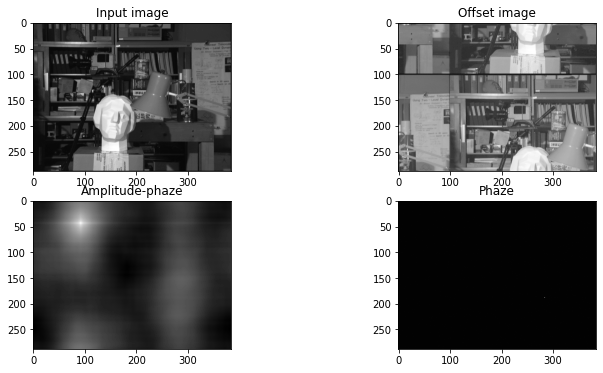

Detected pixel offset: [144. 192.]


In [ ]:
image = cv2.imread('left.png',0)
shift = (100, 100)

offset_image = (255.0/3)*(image/(255.0/2))**0.5
offset_image = fourier_shift(np.fft.fftn(offset_image), shift)
offset_image = np.fft.ifftn(offset_image)

print("Known offset: {}".format(shift))

phase_and_show(image, offset_image)

Вычисление амплитудно-фазовой и фазовой корреляций при нулевом векторе смещения

Known offset: (0, 0)
(-1.5845154237957028e-16, 1.0, (895, 4346), (0, 0))


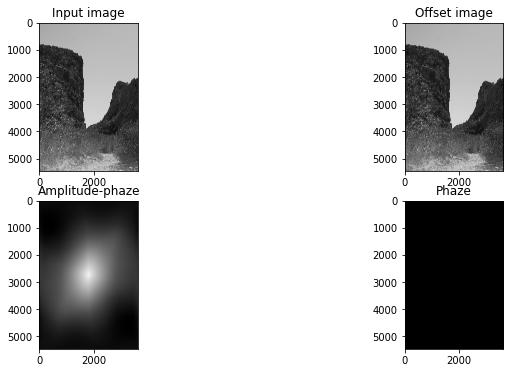

Detected pixel offset: [2728. 1816.]


In [ ]:
image = cv2.imread('img.JPG',0)
shift = (0, 0)

offset_image = fourier_shift(np.fft.fftn(image), shift)
offset_image = np.fft.ifftn(offset_image)

print("Known offset: {}".format(shift))

phase_and_show(image, offset_image)

Вычисление амплитудно-фазовой и фазовой корреляций при векторе смещения (500, 500)

Known offset: (500, 500)
(-8.156209880329384e-14, 1.0, (3132, 4955), (3132, 4956))


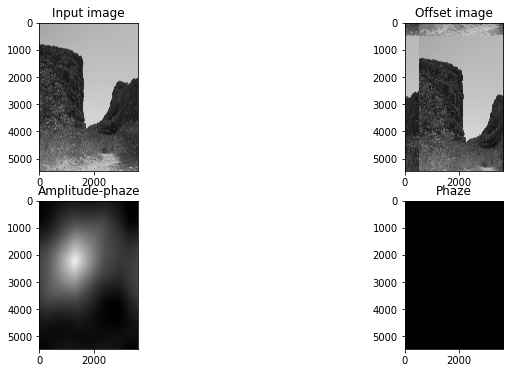

Detected pixel offset: [2728. 1816.]


In [ ]:
image = cv2.imread('img.JPG',0)
shift = (500, 500)

offset_image = fourier_shift(np.fft.fftn(image), shift)
offset_image = np.fft.ifftn(offset_image)

print("Known offset: {}".format(shift))

phase_and_show(image, offset_image)

Вычисление амплитудно-фазовой и фазовой корреляций при нулевом векторе смещения в разное время суток

(-0.005212052870866189, 0.9339993788961223, (1, 5454), (0, 0))


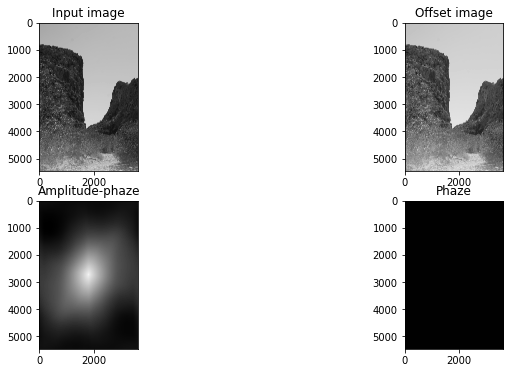

Detected pixel offset: [2728. 1816.]


In [ ]:
image = cv2.imread('img.JPG',0)
shift = (0, 0)

offset_image = (255.0/3)*(image/(255.0/2))**0.5

phase_and_show(image, offset_image)